Dataset Preview:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25681    1096     658         7  Electronics  Electronic Games   
1  B-26055    5729      64        14    Furniture            Chairs   
2  B-25955    2927     146         8    Furniture         Bookcases   
3  B-26093    2847     712         8  Electronics          Printers   
4  B-25602    2617    1151         4  Electronics            Phones   

   PaymentMode  
0          COD  
1          EMI  
2          EMI  
3  Credit Card  
4  Credit Card  

Columns: ['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category', 'PaymentMode']

Summary Statistics:
            Amount      Profit     Quantity
count  1500.000000  1500.00000  1500.000000
mean    291.847333    24.64200     3.743333
std     461.924620   168.55881     2.184942
min       4.000000 -1981.00000     1.000000
25%      47.750000   -12.00000     2.000000
50%     122.000000     8.00000     3.000000
75%     326.250000    38.00

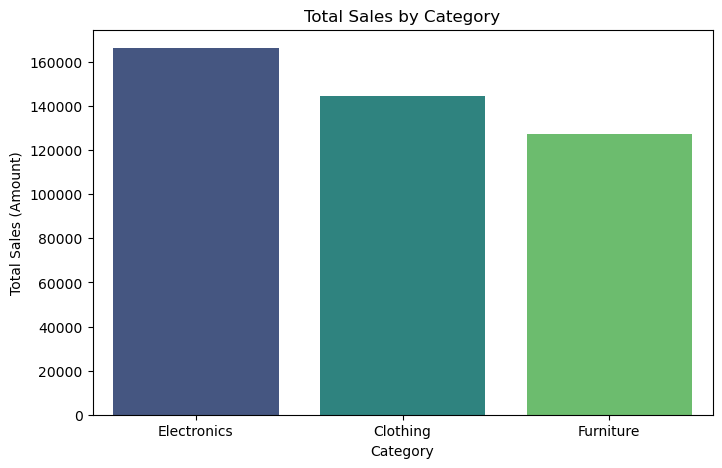

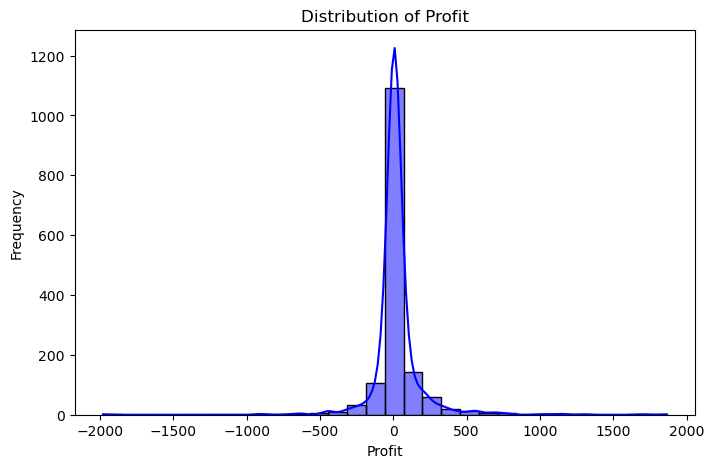

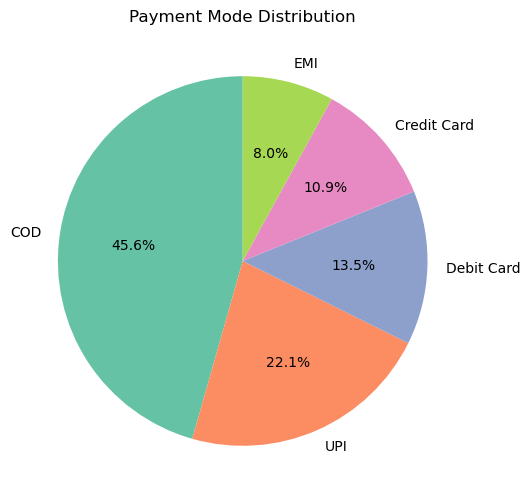

C:\Users\Abdullah Umer\AppData\Local\Temp\ipykernel_3416\2387468474.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Profit", data=df, palette="coolwarm")


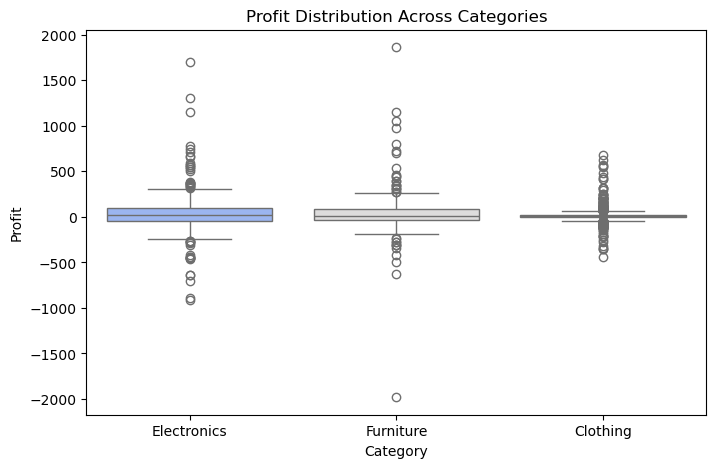

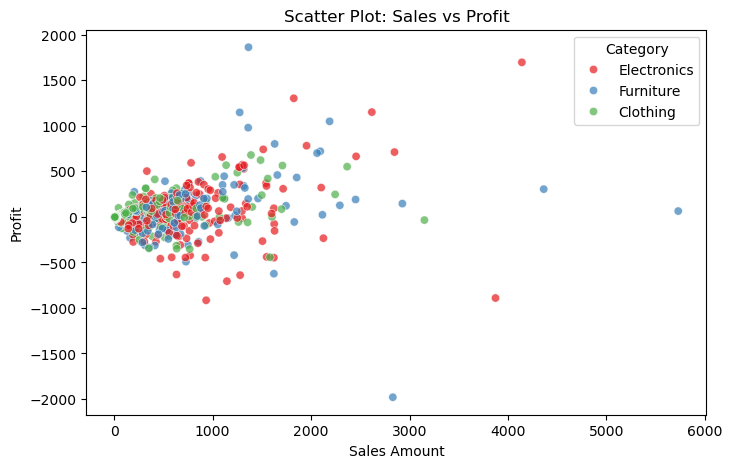

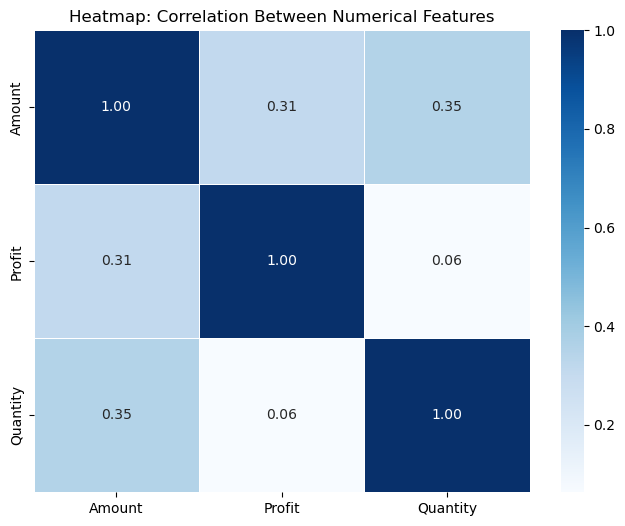

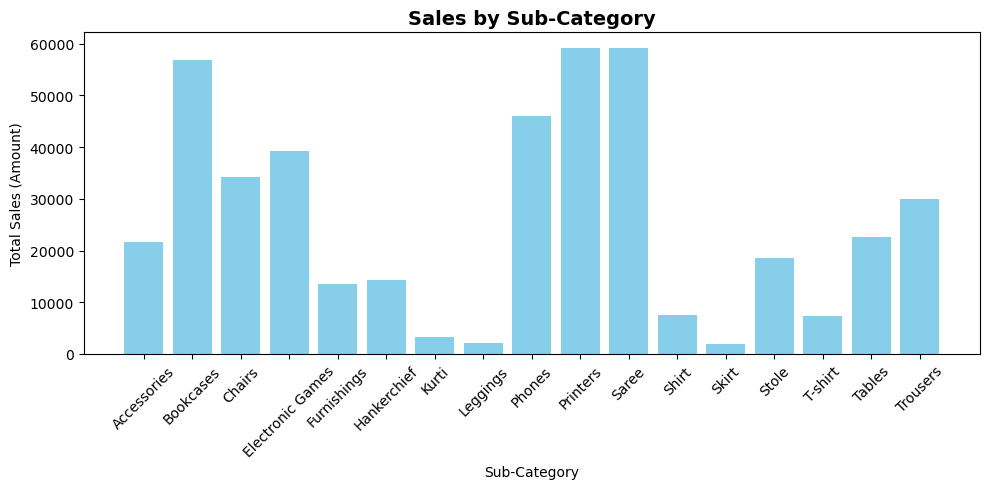

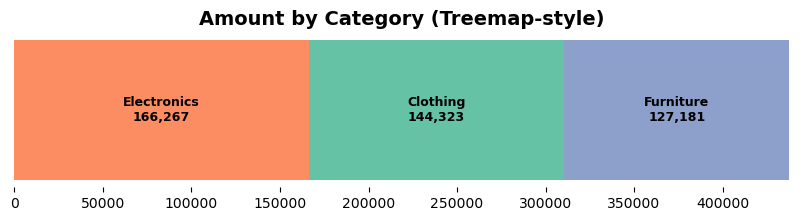

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataSet
df = pd.read_csv("C:/Users/Abdullah Umer/Desktop/Data Sentinel Internship/Task3/Order_Details.csv")

# Quick Preview
print("Dataset Preview:")
print(df.head())
print("\nColumns:", df.columns.tolist())
print("\nSummary Statistics:")
print(df.describe())

# Visualization 1: Bar Plot (Total Sales by Category)
plt.figure(figsize=(8,5))
sales_by_category = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, hue=sales_by_category.index, palette="viridis", legend=False)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (Amount)")
plt.show()

# Visualization 2: Histogram (Distribution of Profit)
plt.figure(figsize=(8,5))
sns.histplot(df["Profit"], bins=30, kde=True, color="blue")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

# Visualization 3: Pie Chart (Payment Mode Share)
plt.figure(figsize=(6,6))
payment_mode_counts = df["PaymentMode"].value_counts()
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Payment Mode Distribution")
plt.show()

# Visualization 4: Boxplot (Profit by Category)
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Profit", data=df, palette="coolwarm")
plt.title("Profit Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

# Visualization 5: Scatter Plot (Sales vs Profit)
plt.figure(figsize=(8,5))
sns.scatterplot(x="Amount", y="Profit", data=df, hue="Category", palette="Set1", alpha=0.7)
plt.title("Scatter Plot: Sales vs Profit")
plt.xlabel("Sales Amount")
plt.ylabel("Profit")
plt.show()

# Visualization 6: Heatmap (Correlation Matrix)
plt.figure(figsize=(8,6))
corr = df[["Amount","Profit","Quantity"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Between Numerical Features")
plt.show()

# Visualization 7: Column Chart (Amount bu Sub-Category)
sales_by_subcat = df.groupby("Sub-Category")["Amount"].sum().reset_index()
plt.figure(figsize=(10,5))
plt.bar(sales_by_subcat["Sub-Category"], sales_by_subcat["Amount"], color="skyblue")
plt.title("Sales by Sub-Category", fontsize=14, fontweight="bold")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Aggregate sales by category
amount_col = "Amount" if "Amount" in df.columns else "Sales"
cat_col = "Category" if "Category" in df.columns else "Sub-Category"

sales_by_category = (
    df.groupby(cat_col, as_index=False)[amount_col]
    .sum()
    .sort_values(amount_col, ascending=False)
)

# Normalize values to fit into a bar (to simulate treemap proportion)
total = sales_by_category[amount_col].sum()
fractions = sales_by_category[amount_col] / total

# Plot stacked horizontal bar (Treemap alternative)
fig, ax = plt.subplots(figsize=(10, 2))
left = 0
for i, row in sales_by_category.iterrows():
    ax.barh(0, row[amount_col], left=left, color=sns.color_palette("Set2")[i % 10])
    ax.text(
        left + row[amount_col] / 2,
        0,
        f"{row[cat_col]}\n{row[amount_col]:,.0f}",
        ha="center",
        va="center",
        fontsize=9,
        fontweight="bold"
    )
    left += row[amount_col]

ax.set_xlim(0, total)
ax.set_yticks([])
ax.set_title(f"{amount_col} by {cat_col} (Treemap-style)", fontsize=14, fontweight="bold")
sns.despine(left=True, bottom=True)
plt.show()